# The Confusion Matrix and ROC Curve for a simple clothing classifier

![Garbage Math](https://imgs.xkcd.com/comics/garbage_math.png)

In [249]:
# software libraries we will be using
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc, RocCurveDisplay
from jupyterthemes import jtplot
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


## Gathering our data
The variable X stands for the set of data that the model runs on.

The variable y stands for set of labels that are the answer key the model uses to tell if it is correct.

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()


Classes that exist in the data. We are training our model to correctly classify 'T-Shirt/top' and not-'T-shirt/top'.


In [ ]:
class_names = ['T-shirt/top', 'Trousers', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


Classes that we will be using:


In [ ]:
binary_classifier = ['T-shirt/top', 'everything_else']


What the training images look like


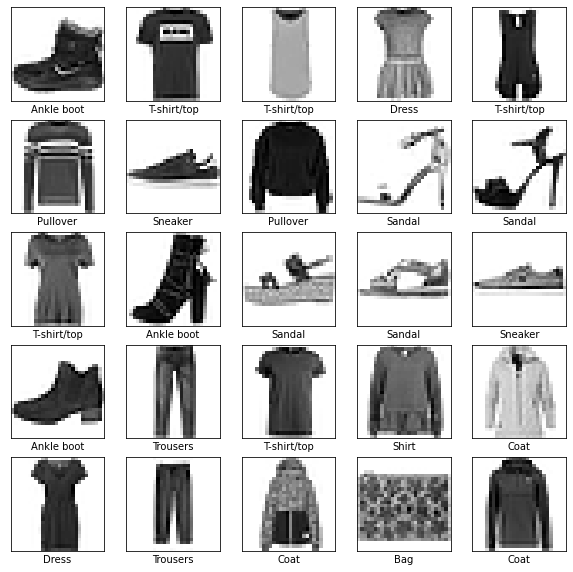

In [273]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()


Preprocessing our data to make the values we train on between 0 and 1 for performance reasons


In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0


The label array has values between 0 and 9, which stand for the index position of the 'class_names' variable above, here a value of '0' would mean that the sample is a T-shirt/top.
Here, we are going through the labels and setting the value to '0' for 'T-shirt/top' anywhere that the label indicates T-shirt/top, and '1' for 'everything_else'.

In [ ]:
y_train_binary = np.asarray([0 if i == 0 else 1 for i in y_train])
y_test_binary = np.asarray([0 if i == 0 else 1 for i in y_test])


## Building our neural network
Lots of things happening here, way out of scope for this session.


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')])
model.compile(optimizer='sgd', loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])


## Training the model to classify clothing classes.
If you change the 'epochs' variable, the model training will run more times. This generally makes the model more accurate, until it begins to overfit the training data. The topic of overfitting is also outside the scope of this session.

In [ ]:
model.fit(X_train, y_train_binary, epochs=3)


## Checking our model accuracy


In [ ]:
_, test_acc = model.evaluate(X_test, y_test_binary, verbose=2)
print('\nTest accuracy:', test_acc)


## Using the model to make predictions on the test set


In [ ]:
predictions = model.predict(X_test)



# The Confusion Matrix


In [ ]:
threshold = 0.90


After setting the threshold, we pick the predictions that were higher than the threshold and compute the confusion matrix.

The confusion matrix shape is $\begin{bmatrix} TP & FP \\ FN & TN \\ \end{bmatrix}$


In [ ]:
choice = [1 if i > threshold else 0 for i in predictions]
tn, fp, fn, tp = confusion_matrix(y_test_binary, choice).ravel()
cm = np.asarray([[tp, fp], [fn, tn]])
print(cm)


# ROC Curve

ROC Curve
[1.9999973  0.99999726 0.9999967  ... 0.02777433 0.02747843 0.01535162]


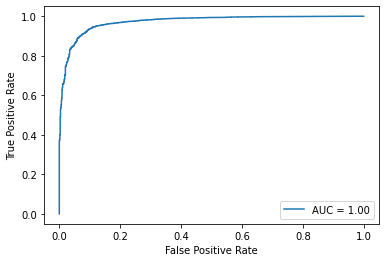

In [272]:
def roc_plotting():
    fpr, tpr, thresholds = roc_curve(y_test_binary, predictions)
    print(thresholds)
    display = RocCurveDisplay(fpr, tpr, roc_auc=auc(fpr, tpr))
    jtplot.style(context='poster', fscale=1.4, gridlines='--')
    display.plot()
    plt.show()


roc_plotting()